In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount( '/content/drive', force_remount=True)

Mounted at /content/drive


# $ \color{blue}{ \textit{ Create Data: } } $

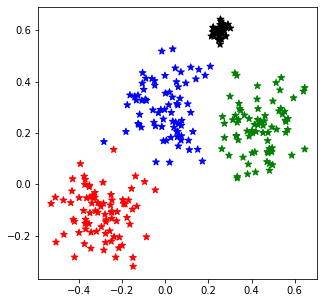

In [ ]:
import random

ys = [ -0.1, 0.2, 0.3, 0.6 ]
xs = [ -0.3, 0.45, 0, 0.25 ]
rs = [ 0.25, 0.25, 0.25, 0.05 ] 
ns = [ 80, 75, 75, 40 ]

cols = [ 'red', 'green', 'blue', 'black' ]

cx = []
cy = []
cc = []
ci = []
for n in range( len(ys) ):
    for _ in range( ns[n] ):
        cx.append( 0.4 * rs[n] * np.random.randn(1)[0] + xs[n] )
        cy.append( 0.4 * rs[n] * np.random.randn(1)[0] + ys[n] )
        cc.append( cols[n] )
        ci.append( n )



plt.figure( figsize=(5,5) ) 
plt.scatter( cx, cy, s=50, c=cc , marker = '*')
plt.show()

In [ ]:
cloud = []

for n in range( len(cx) ):
    cloud.append( [ cx[n], cy[n], ci[n]] )

In [ ]:
# np.save( '/content/drive/MyDrive/Classifier/cloud_data_1.npy', cloud )
# print( int(np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )[190,2]) )

# $ \color{blue}{ \textit{ Classify Data: } } $

## $ \color{blue}{ \textit{ Data visualisation: } } $

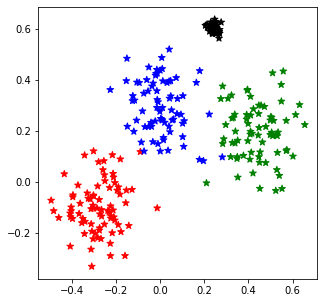

In [ ]:
data = np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )

cols = [ 'red', 'green', 'blue', 'black' ]


X = [ x for x in data[:,0] ]
Y = [ y for y in data[:,1] ]
C = [ cols[int( n )] for n in data[:,2] ]


plt.figure( figsize = (5,5) )
plt.scatter( X, Y, c = C, s=50, marker = '*' )
plt.show()

## $ \color{blue}{ \textit{ Classification } } $

In [13]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


################################################################################
# Load data:
################################################################################
# read data from npy file
data = np.load( '/content/drive/MyDrive/Classifier/cloud_data_1.npy' )

dataset = pd.DataFrame({'abscissa': data[:, 0], 'ordinate': data[:, 1], 'class': data[:, 2].astype('int64') })

# splitting data into training and test set
training_set,test_set = train_test_split( dataset, test_size=0.2,random_state=1)


################################################################################
# train the model:
################################################################################
# prepare data for applying it to svm
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target
#print(x_train,y_train)
#print(x_test,y_test)

# fitting the data (train a model)    || kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
rf = RandomForestClassifier( n_estimators = 25 )
rf.fit( x_train, y_train)


################################################################################
# Accuracy:
################################################################################
# perform prediction on x_test data
y_pred = rf.predict( x_test)

# creating confusion matrix and accuracy calculation
cm = confusion_matrix(y_test,y_pred)
print( 'Confusion matrix: \n', cm, '\n')
accuracy = float(cm.diagonal().sum())/len(y_test)
print( 'Model accuracy is:', accuracy*100,'%')


Confusion matrix: 
 [[13  0  1  0]
 [ 0 14  0  0]
 [ 0  0 18  0]
 [ 0  0  0  8]] 

Model accuracy is: 98.14814814814815 %


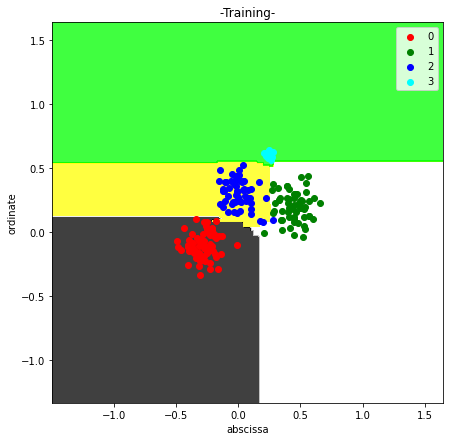

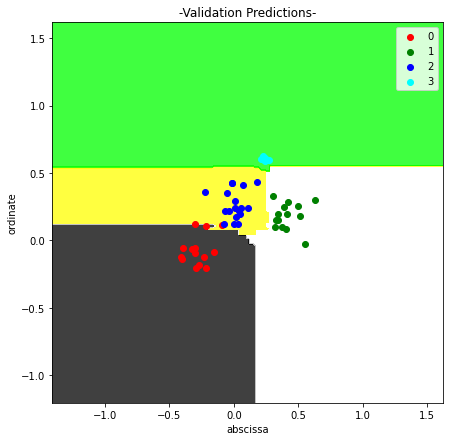

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


################################################################################
# Visualizing training:
################################################################################
training_set, test_set = train_test_split( dataset, test_size=0.2, random_state=1)

x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target

# visualizing the training data after model fitting
plt.figure(figsize=(7,7))
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf( x1, x2, rf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black', 'white', 'yellow', 'lime' )))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red', 'green', 'blue', 'cyan'))(i),
                label = j)

plt.title(' -Training- ')
plt.xlabel('abscissa') 
plt.ylabel('ordinate')
plt.legend()
plt.show()


################################################################################
# Visualizing the predictions:
################################################################################
plt.figure(figsize=(7,7))
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf( x1, x2, rf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black','white', 'yellow', 'lime')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red', 'green', 'blue', 'cyan'))(i),
                label = j)

plt.title(' -Validation Predictions- ')
plt.xlabel('abscissa')
plt.ylabel('ordinate')
plt.legend()
plt.show()